In [1]:
import numpy as np
import cv2
from tqdm import tqdm
import re
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def sorting_data(data):
    con = lambda text: int(text) if text.isdigit() else text.lower()
    num_key = lambda key: [con(c) for c in re.split('([0-9]+)',key) ]
    return sorted(data, key = num_key)

In [4]:
size = 160
img_c = []
path = '/kaggle/input/landscape-image-colorization/landscape Images/color'
files = os.listdir(path)
files = sorting_data(files)
for i in tqdm(files):
  if i == '5000.jpg':
    break
  else:
    img = cv2.imread(path+'/'+i,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = cv2.resize(img, (size,size,))
    img = img.astype('float32')/255
    img_c.append(img_to_array(img))



 70%|███████   | 5000/7129 [00:35<00:14, 142.01it/s]


In [5]:
img_g = []
path = '/kaggle/input/landscape-image-colorization/landscape Images/gray'
files = os.listdir(path)
files = sorting_data(files)
for i in tqdm(files):
  if i == '5000.jpg':
    break
  else:
    img = cv2.imread(path+'/'+i,1)

    img = cv2.resize(img, (size,size,))
    img = img.astype('float32')/255
    img_g.append(img_to_array(img))

 70%|███████   | 5000/7129 [00:48<00:20, 102.75it/s]


In [6]:
print('no.of color images: ',len(img_c))
print('no.of gray images: ',len(img_g))

no.of color images:  5000
no.of gray images:  5000


In [7]:
img_c[1]

array([[[0.07843138, 0.11764706, 0.16470589],
        [0.827451  , 0.8784314 , 0.92156863],
        [0.78431374, 0.8392157 , 0.94509804],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.12941177, 0.16470589, 0.21960784],
        [0.8235294 , 0.87058824, 0.9254902 ],
        [0.7490196 , 0.8156863 , 0.91764706],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.16078432, 0.20392157, 0.26666668],
        [0.8509804 , 0.90588236, 0.92941177],
        [0.7764706 , 0.8509804 , 0.9372549 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.7372549 , 0.61960787, 0.11372549],
        [0.7647059 , 0.6509804 , 0.14117648],
        [0.7647059 , 0

In [8]:
img_g[1]

array([[[0.10980392, 0.10980392, 0.10980392],
        [0.87058824, 0.87058824, 0.87058824],
        [0.8352941 , 0.8352941 , 0.8352941 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.16078432, 0.16078432, 0.16078432],
        [0.8666667 , 0.8666667 , 0.8666667 ],
        [0.80784315, 0.80784315, 0.80784315],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.19607843, 0.19607843, 0.19607843],
        [0.8980392 , 0.8980392 , 0.8980392 ],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.5921569 , 0.5921569 , 0.5921569 ],
        [0.627451  , 0.627451  , 0.627451  ],
        [0.6156863 , 0

In [9]:
def graph_img(color, gray):
  plt.figure(figsize = (15, 15))
  plt.subplot(1, 3, 1)
  plt.title('Color Image', color = 'green', fontsize = 20)
  plt.imshow(color)
  plt.subplot(1, 3, 2)
  plt.title('Grayscale Image', color = 'black', fontsize = 20)
  plt.imshow(gray)


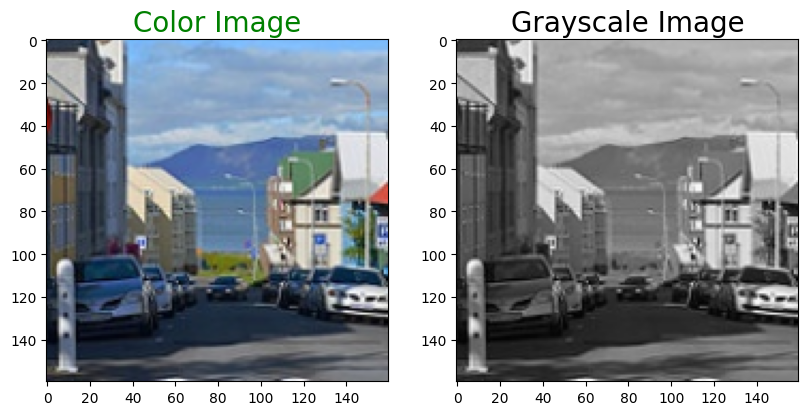

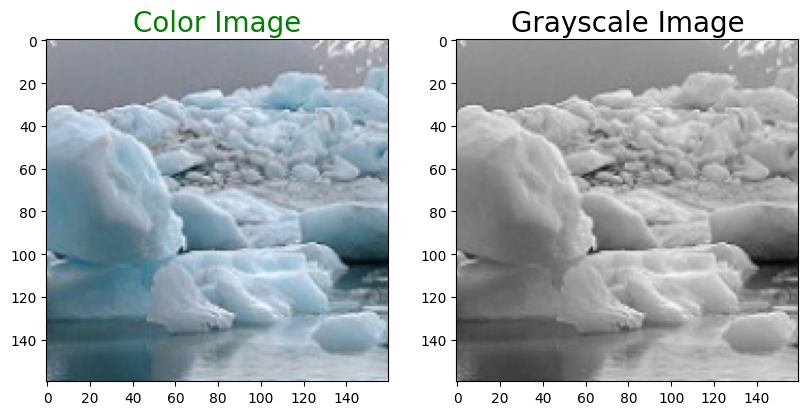

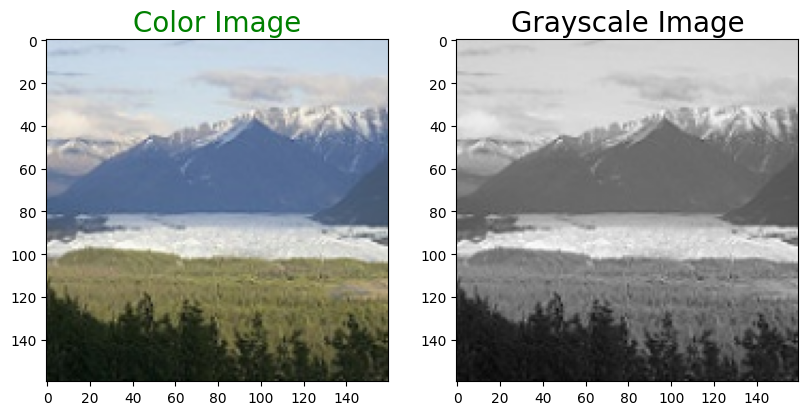

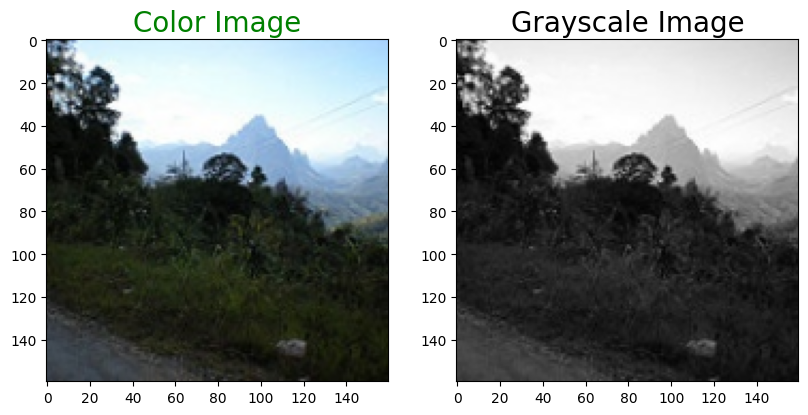

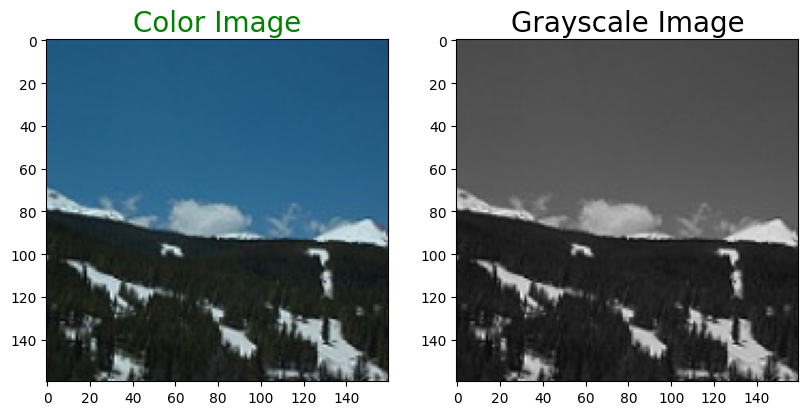

In [10]:
for i in range (5,10):
  graph_img(img_c[i], img_g[i])

In [11]:
train_img_g = img_g[:4500]
test_img_g = img_g[4500:]

train_img_c = img_c[:4500]
test_img_c = img_c[4500:]

train_g = np.reshape(train_img_g,(len(train_img_g), 160, 160, 3))
test_g = np.reshape(test_img_g, (len(test_img_g), 160, 160, 3))

train_c = np.reshape(train_img_c, (len(train_img_c), 160, 160, 3))
test_c = np.reshape(test_img_c, (len(test_img_c), 160, 160, 3))

In [12]:
train_c.shape,test_c.shape

((4500, 160, 160, 3), (500, 160, 160, 3))

In [13]:
import tensorflow as tf
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
import keras
from keras import layers

def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

def model():
    inputs = layers.Input(shape= [160,160,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)

    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

In [14]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 80, 80, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 40, 40, 128)          147584    ['sequential[0][0]']          
                                                                                                  
 sequential_2 (Sequential)   (None, 20, 20, 256)          296192    ['sequential_1[0][0]']        
                                                                                              

In [15]:
%%time
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'mean_absolute_error', metrics = ['acc'])
model.fit(train_g, train_c, validation_split=0.1, epochs = 200,batch_size = 30)

Epoch 1/200
135/135 [==============================] - 25s 91ms/step - loss: 0.0792 - acc: 0.3964 - val_loss: 0.0695 - val_acc: 0.3637
Epoch 2/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0567 - acc: 0.4673 - val_loss: 0.1342 - val_acc: 0.4689
Epoch 3/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0520 - acc: 0.4879 - val_loss: 0.0573 - val_acc: 0.4346
Epoch 4/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0500 - acc: 0.4946 - val_loss: 0.0547 - val_acc: 0.4851
Epoch 5/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0488 - acc: 0.5020 - val_loss: 0.0631 - val_acc: 0.3201
Epoch 6/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0479 - acc: 0.5064 - val_loss: 0.0486 - val_acc: 0.5584
Epoch 7/200
135/135 [==============================] - 11s 84ms/step - loss: 0.0469 - acc: 0.5195 - val_loss: 0.0472 - val_acc: 0.5153
Epoch 8/200
135/135 [==============================] - 

In [16]:
model.evaluate(test_g,test_c)

16/16 [==============================] - 1s 49ms/step - loss: 0.0480 - acc: 0.5528


[0.04803873226046562, 0.5527654886245728]

In [17]:
model.save("RGBmodel5k.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

1/1 [==============================] - 0s 376ms/step


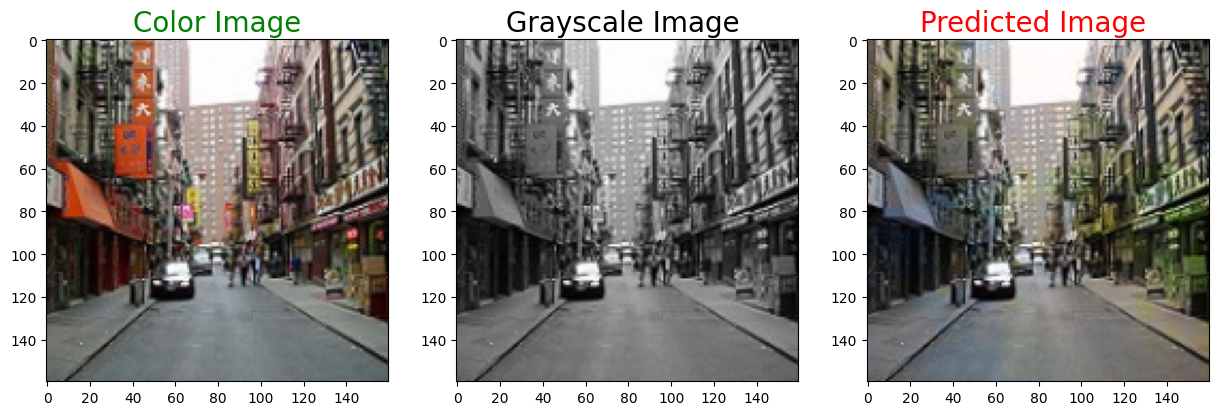

1/1 [==============================] - 0s 19ms/step


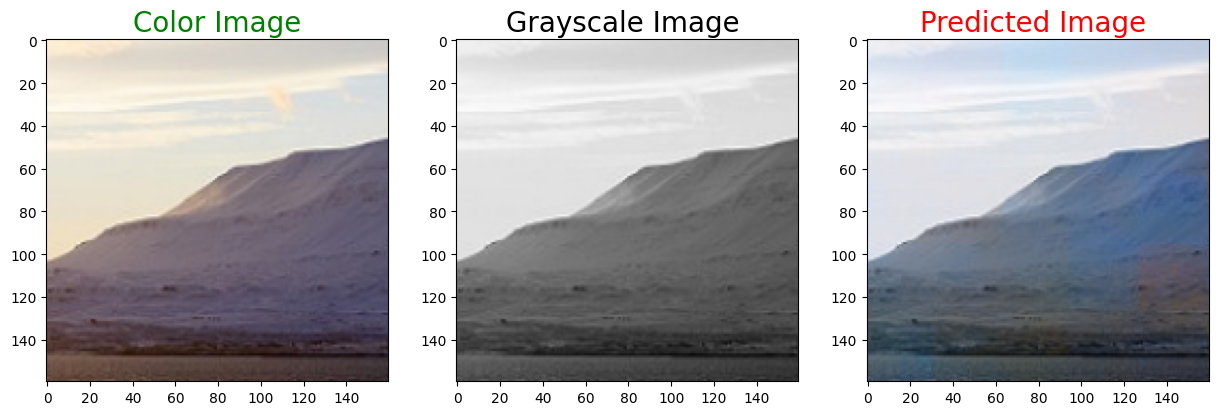

1/1 [==============================] - 0s 28ms/step


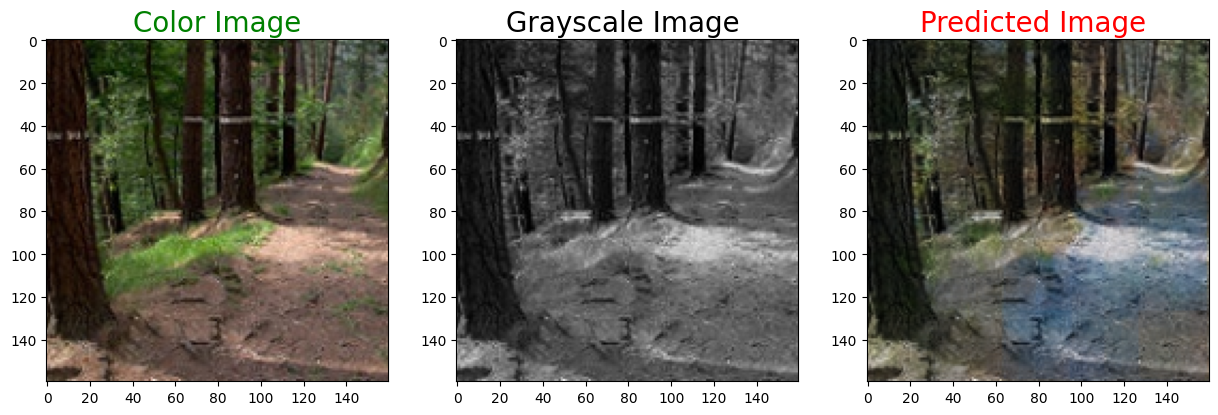

1/1 [==============================] - 0s 21ms/step


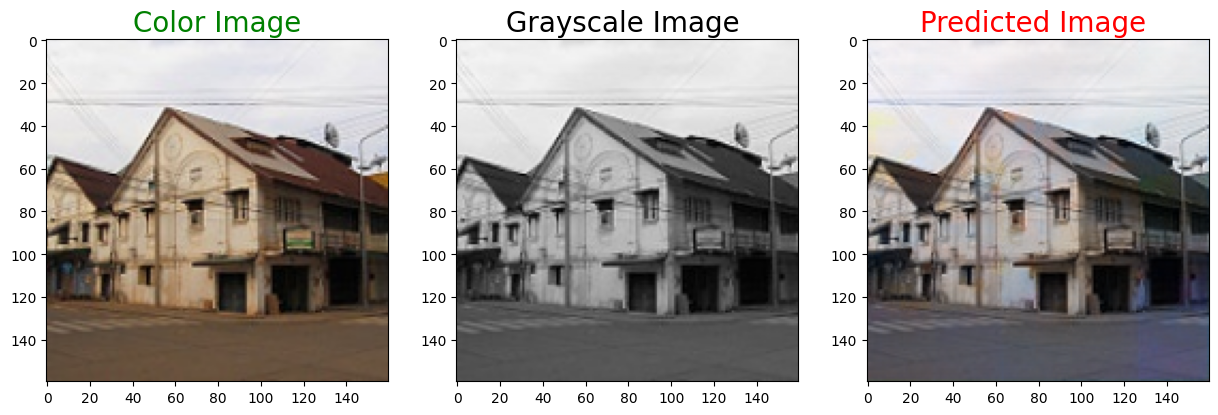

1/1 [==============================] - 0s 21ms/step


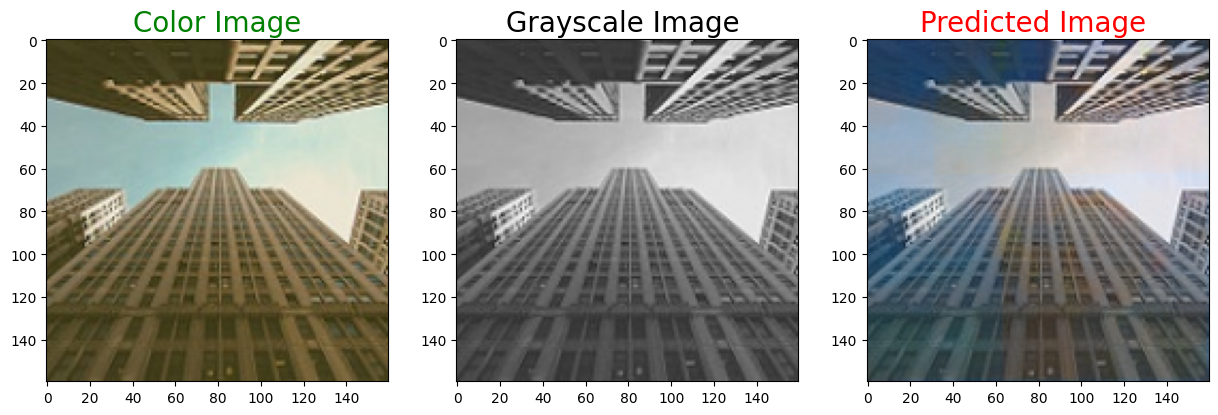

1/1 [==============================] - 0s 22ms/step


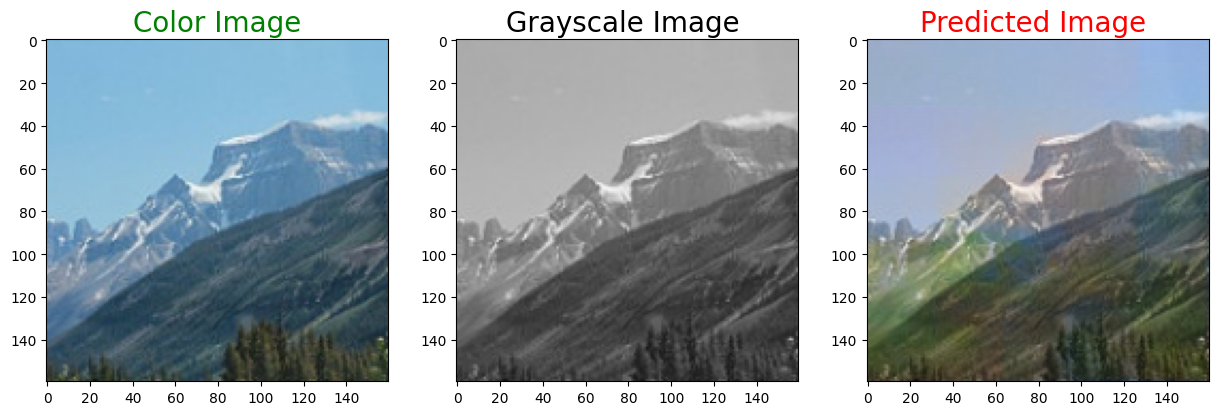

In [19]:
for i in range(50,56):
    predicted = np.clip(model.predict(test_g[i].reshape(1,size, size,3)),0.0,1.0).reshape(size, size,3)
    plot_images(test_c[i],test_g[i],predicted)